# Grupo 05 IA | Práctica 1

* Boris Carballa Corredoira
* Juan Carlos Villanueva Quirós
* Francisco Javier Blázquez Martínez

# Parte 3: Regresión


In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing   import StandardScaler
from sklearn.neural_network  import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics         import mean_squared_error

### 1) Conjunto de datos

Obtención y limpieza de datos. Desechamos el campo "región" del dataframe obtenido y todas las entradas con valores no inicializados.

In [2]:
## Data can be found at: https://www.kaggle.com/noxmoon/world-countries-predicting-gdp
paises = pd.read_csv("countries.csv")
paises = paises.drop(['Region'], axis=1)
paises = paises.dropna()
paises

,Country,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP (USD per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
6,Anguilla,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
7,Antigua & Barbuda,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,Venezuela,25730435,912050,28.2,0.31,-0.04,22.20,4800.0,93.4,140.1,2.95,0.92,96.13,2.0,18.71,4.92,0.040,0.419,0.541
219,Vietnam,84402966,329560,256.1,1.05,-0.45,25.95,2500.0,90.3,187.7,19.97,5.95,74.08,2.0,16.86,6.22,0.209,0.410,0.381
224,Yemen,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


En este punto tenemos cargado ya nuestro DataFrame **paises**. Este contiene información sobre distintos paises (población, tasa de nacimientos, **PIB**...). En concreto las variables de las que se tiene información para cada país son las siguientes:

In [3]:
paises.dtypes

Country                                object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP (USD per capita)                  float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                               float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
dtype: object

Un sencillo análisis de estas variables por separado nos arroja los siguientes indicadores, de los que cabe destacar en absolutamente todos los parámetros controlados la enorme diferencia entre el país con valor máximo y mínimo junto con una desviación típica grande. Esto es un buen indicativo pues si nuestros datos no se distribuyen de forma anómala, cabe esperar tener información de todas las regiones de nuestro espacio muestral. 

In [4]:
paises.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Population,179.0,3.421415e+07,1.317639e+08,13477.000,1.188580e+06,6940432.000,2.086014e+07,1.313974e+09
Area (sq. mi.),179.0,5.641830e+05,1.395657e+06,28.000,1.991500e+04,118480.000,4.964410e+05,9.631420e+06
Pop. Density (per sq. mi.),179.0,2.948050e+02,1.379353e+03,1.800,2.680000e+01,66.900,1.647000e+02,1.618300e+04
Coastline (coast/area ratio),179.0,1.649520e+01,7.397760e+01,0.000,9.000000e-02,0.630,5.355000e+00,8.706600e+02
Net migration,179.0,-2.065363e-01,4.751216e+00,-20.990,-1.315000e+00,0.000,3.950000e-01,2.306000e+01
Infant mortality (per 1000 births),179.0,3.889816e+01,3.535300e+01,2.290,9.990000e+00,24.310,6.460500e+01,1.630700e+02
GDP (USD per capita),179.0,9.125698e+03,9.644123e+03,500.000,1.800000e+03,5100.000,1.295000e+04,3.780000e+04
Literacy (%),179.0,8.194413e+01,1.983754e+01,17.600,6.995000e+01,90.900,9.780000e+01,1.000000e+02
Phones (per 1000),179.0,2.081520e+02,2.101219e+02,0.200,2.710000e+01,137.100,3.350000e+02,8.980000e+02
Arable (%),179.0,1.400045e+01,1.315240e+01,0.000,3.675000e+00,10.530,2.000000e+01,6.211000e+01


**El problema al que nos enfrentamos en este punto consiste en crear un estimador del PIB (GPD siglas en inglés) de un pais dadas las variables anteriormente presentadas.**

### 2) Elección de variables

Para saber qué variables son más relevantes a la hora de estimar el PIB de un pais analizamos el coeficiente de correlación de estas en nuestros datos.

In [5]:
corr_matrix = paises.corr()
corr_matrix['GDP (USD per capita)']

Population                           -0.033618
Area (sq. mi.)                        0.068356
Pop. Density (per sq. mi.)            0.190122
Coastline (coast/area ratio)          0.035815
Net migration                         0.378790
Infant mortality (per 1000 births)   -0.639090
GDP (USD per capita)                  1.000000
Literacy (%)                          0.522880
Phones (per 1000)                     0.883520
Arable (%)                            0.046465
Crops (%)                            -0.207844
Other (%)                             0.066445
Climate                               0.360567
Birthrate                            -0.658795
Deathrate                            -0.247562
Agriculture                          -0.616919
Industry                              0.032855
Service                               0.536551
Name: GDP (USD per capita), dtype: float64

Sorprende la bajísima correlación de un elemento tan importante en la economía de los paises desarrollados como es el grado de industrialización. A su vez soprprende la altísima correlación de factores a priori no relacionados de forma directa como la mortalidad infantil y sorprende a su vez que en nuestros datos la tasa de nacimientos se relaciona de forma inversa con el PIB (más nacimientos se correlaciona con menos PIB).

Optamos por cosiderar relevantes aquellas variables con un coeficiente de correlación (positivo o negativo) mayor que $1/2$. De esta forma únicamente rechazamos el clima y la tasa de migración como variables con una correlación alta ($> 1/3$) en nuestro modelo.

In [6]:
# Variables con coef. de correlación >1/2 con el PIB en nuestros datos quitando la variable PIB
corr_matrix[abs(corr_matrix['GDP (USD per capita)']) > 0.5]['GDP (USD per capita)'].drop('GDP (USD per capita)')

Infant mortality (per 1000 births)   -0.639090
Literacy (%)                          0.522880
Phones (per 1000)                     0.883520
Birthrate                            -0.658795
Agriculture                          -0.616919
Service                               0.536551
Name: GDP (USD per capita), dtype: float64

Tabla con únicamente las variables que nos interesan para el modelo de predicción de PIB.

In [7]:
# Nos quedamos únicamente con las columnas que nos interesan
paises_corr = paises.loc[:,[
'Infant mortality (per 1000 births)',
'Literacy (%)',
'Phones (per 1000)',                     
'Birthrate',                           
'Agriculture',                          
'Service'
]]

# Guardamos también el resultado esperado
paises_pib = paises.loc[:,['GDP (USD per capita)']]

### 3) Normalización de datos
A pesar de no ser estrictamente necesario, debido a que el número de datos de entrenamiento no es en absoluto alto y para disminuir también el tiempo de entrenamiento hemos optado por normalizar los datos que emplea nuestro MLP.

In [8]:
# Escalado de los datos de entrada
scaler_x = StandardScaler()
paises_escalados = scaler_x.fit_transform(paises_corr)

# Escalado de los datos de salida
scaler_y = StandardScaler()
paises_pib_escalado = scaler_y.fit_transform(paises_pib) 

# pd.DataFrame(scaler_x.inverse_transform(paises_escalados))
# pd.DataFrame(scaler_y.inverse_transform(paises_pib_escalado))

### 4) MLPs y análisis con validación cruzada

Una vez que tenemos los datos escalados, vamos a entrenar a un MLP de una única capa interna con 200 neuronas y analizar su comportamiento para distintos valores de regulación (funciones de activación elegidas tipo ReLU).

In [9]:
regul_param_range = 10.0 ** -np.arange(1, 7) 

cv_scores_mean=[]
cv_scores_std=[]

for regul_param in regul_param_range:
    # aumentamos el parámetro max_iter hasta que converja
    mlp=MLPRegressor(hidden_layer_sizes=200, activation='relu', solver='adam', alpha=regul_param, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, max_iter=500)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, paises_escalados, paises_pib_escalado.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())

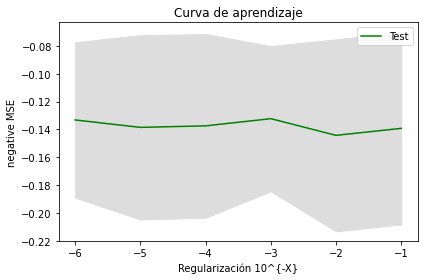

In [10]:
# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit=np.array(cv_scores_mean)-np.array(cv_scores_std)
upper_limit=np.array(cv_scores_mean)+np.array(cv_scores_std)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Ahora analizamos el comportamiento de un MLP con las mismas características variando únicamente el número de capas y su tamaño, dos capas de 50 neuronas cada una. 

In [11]:
regul_param_range = 10.0 ** -np.arange(1, 7) 

cv_scores_mean=[]
cv_scores_std=[]

for regul_param in regul_param_range:
    # aumentamos el parámetro max_iter hasta que converja
    mlp=MLPRegressor(hidden_layer_sizes=(50,50), activation='relu', solver='adam', alpha=regul_param, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, max_iter=500)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, paises_escalados, paises_pib_escalado.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())

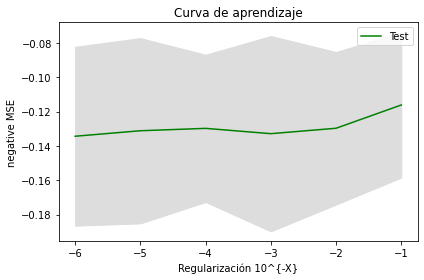

In [12]:
# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit=np.array(cv_scores_mean)-np.array(cv_scores_std)
upper_limit=np.array(cv_scores_mean)+np.array(cv_scores_std)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

### 5) Análisis de errores:
Tras varios entrenamientos y validaciones cruzadas hemos observado que el MLP con una única capa oculta de 200 neuronas se mantiene para estable para todos los valores de regulación en torno a un ECM de 0.14 puntos (medido con las variables estandarizadas). El MLP constituido con dos capas ocultas de 50 neuronas presenta un mejor comportamiento en las validaciones cruzadas para todos los valores de regulación pero en especial para $10^{-3}$ (ECM inferior incluso a 0.12).

In [13]:
regul_param=10**-3

mlp=MLPRegressor(hidden_layer_sizes=(50,50), activation='relu', solver='adam', alpha=regul_param, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, max_iter=500)
mlp.fit(paises_escalados, paises_pib_escalado.ravel())
predicciones = scaler_y.inverse_transform(mlp.predict(paises_escalados))
#paises_pib.values 

Text(0.5, 1.0, 'Y Vs Y_pred')

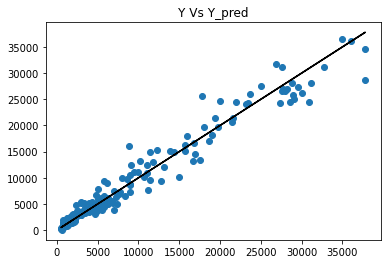

In [14]:
fig = plt.figure()
ax = plt.axes()

# dibujamos los errores: la distancia a la recta indica el nivel de error
ax.scatter(paises_pib.values, predicciones) 
# Pintamos la referencia de la predicción perfecta
ax.plot(paises_pib.values, paises_pib.values, color='k') 

plt.title('Y Vs Y_pred')

Vemos una aproximación bastante razonable pero con algunos puntos anómalos (donde el pib se subestima o sobreestima demasiado). Vamos a analizar estos puntos de error.

In [15]:
paises_err = paises.loc[:,[
'Country',
'Infant mortality (per 1000 births)',
'Literacy (%)',
'Phones (per 1000)',                     
'Birthrate',                           
'Agriculture',                          
'Service',
'GDP (USD per capita)'
]]
paises_err['GPD prediction'] = predicciones
paises_err[abs(paises_err['GDP (USD per capita)']-paises_err['GPD prediction'])>(paises_err['GDP (USD per capita)'])]

,Country,Infant mortality (per 1000 births),Literacy (%),Phones (per 1000),Birthrate,Agriculture,Service,GDP (USD per capita),GPD prediction
24,Bolivia,53.11,87.2,71.9,23.30,0.128,0.520,2400.0,4851.849931
63,Eritrea,74.87,58.6,7.9,34.33,0.102,0.643,700.0,1402.343100
224,Yemen,61.50,50.2,37.2,42.89,0.135,0.393,800.0,1918.813752


En la tabla superior se muestra lo que serían los errores abismales, aquellos en los que el error en la estimación es mayor al 100% de esta.

Recordando la tabla de variables que habíamos elegido para hacer nuestro estimador MLP el por qué de estos cobra sentido. Países como el Congo, Comoros, Jamaica, Malawi... son sobreestimados por tener una alta alfabetización y una gran importancia del sector servicios. Cuando además se une a esto una alto número de móbiles por cada mil habitantes como es el caso de Saint Kitts el error en la estimación del PIB crece a casi 9000 USD por habitante.

En el caso de Noruega sucede el efecto contrario, pese a tener buenos indicadores, nuestros datos lo sitúan como un país donde más de la mitad de los habitantes no tienen teléfono y esto penaliza enormemente la predicción de su PIB.

In [16]:
paises_err[paises_err['GDP (USD per capita)']>37000]

,Country,Infant mortality (per 1000 births),Literacy (%),Phones (per 1000),Birthrate,Agriculture,Service,GDP (USD per capita),GPD prediction
154,Norway,3.7,100.0,461.7,11.46,0.021,0.564,37800.0,28609.741486
214,United States,6.5,97.0,898.0,14.14,0.010,0.787,37800.0,34603.538177


### 6) Análisis de otras alternativas
Por último vamos a analizar el comportamiento de nuestro estimador MLP añadiendo la variable que mide el grado de industrialización a pesar de su bajísima correlación. (Se ha apreciado un comportamiento muy variable en función de los entrenamientos, se opta como parámetro de regulación por $10^{-2}$)

In [17]:
# Nos quedamos únicamente con las columnas que nos interesan
paises_corr = paises.loc[:,[
'Infant mortality (per 1000 births)',
'Literacy (%)',
'Phones (per 1000)',                     
'Birthrate',                           
'Agriculture',                          
'Service',
'Industry'
]]

# Guardamos también el resultado esperado
paises_pib = paises.loc[:,['GDP (USD per capita)']]

In [18]:
# Escalado de los datos de entrada
scaler_x = StandardScaler()
paises_escalados = scaler_x.fit_transform(paises_corr)

# Escalado de los datos de salida
scaler_y = StandardScaler()
paises_pib_escalado = scaler_y.fit_transform(paises_pib) 

In [19]:
regul_param=10**-2

mlp=MLPRegressor(hidden_layer_sizes=(50,50), activation='relu', solver='adam', alpha=regul_param, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, max_iter=500)
mlp.fit(paises_escalados, paises_pib_escalado.ravel())
predicciones = scaler_y.inverse_transform(mlp.predict(paises_escalados))
#paises_pib.values 

Text(0.5, 1.0, 'Y Vs Y_pred')

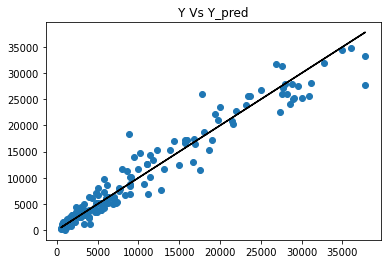

In [20]:
fig = plt.figure()
ax = plt.axes()

# dibujamos los errores: la distancia a la recta indica el nivel de error
ax.scatter(paises_pib.values, predicciones) 
# Pintamos la referencia de la predicción perfecta
ax.plot(paises_pib.values, paises_pib.values, color='k') 

plt.title('Y Vs Y_pred')

Y en efecto el comportamiento no se ha visto significativamente afectado. Si por contra hubiéramos elegido como límite de correlación de nuestras variables de decisión $1/3$ (añadimos clima y migración neta) las predicciones sí que experimentan una ligera mejora.

In [21]:
# Nos quedamos únicamente con las columnas que nos interesan
paises_corr = paises.loc[:,[
'Infant mortality (per 1000 births)',
'Literacy (%)',
'Phones (per 1000)',                     
'Birthrate',                           
'Agriculture',                          
'Service',
'Net migration',
'Climate',
'Industry'
]]

# Guardamos también el resultado esperado
paises_pib = paises.loc[:,['GDP (USD per capita)']]

In [22]:
# Escalado de los datos de entrada
scaler_x = StandardScaler()
paises_escalados = scaler_x.fit_transform(paises_corr)

# Escalado de los datos de salida
scaler_y = StandardScaler()
paises_pib_escalado = scaler_y.fit_transform(paises_pib) 

In [23]:
regul_param=10**-2

mlp=MLPRegressor(hidden_layer_sizes=(50,50), activation='relu', solver='adam', alpha=regul_param, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, max_iter=500)
mlp.fit(paises_escalados, paises_pib_escalado.ravel())
predicciones = scaler_y.inverse_transform(mlp.predict(paises_escalados))
#paises_pib.values 

Text(0.5, 1.0, 'Y Vs Y_pred')

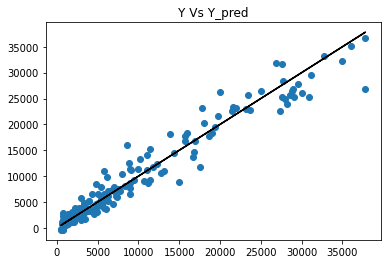

In [24]:
fig = plt.figure()
ax = plt.axes()

# dibujamos los errores: la distancia a la recta indica el nivel de error
ax.scatter(paises_pib.values, predicciones) 
# Pintamos la referencia de la predicción perfecta
ax.plot(paises_pib.values, paises_pib.values, color='k') 

plt.title('Y Vs Y_pred')